<a href="https://colab.research.google.com/github/ryanhao1115/ML-for-Fraud-Detection/blob/main/2_Exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Analysis
1. Data profiling
2. Outliners
3. Abnormal transactions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/finalproject/'

In [ ]:
file = path + 'sales.csv'
df = pd.read_csv(file,index_col=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df = df.drop(columns='status')

### Data profiling

In [ ]:
df.nunique()

distributor       667
sales             215
branch             28
inv_type            8
invoice_no      34074
line_item         368
product_no       1158
prod_cla            7
qty               221
total_amt       18777
sale_price      10763
ship_qty          202
cust_type          21
return             10
discount_app    26878
list_price       8575
invoice_date       63
ship_date         119
request_ship       64
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248831 entries, 0 to 45763
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   distributor   248831 non-null  object        
 1   sales         248831 non-null  object        
 2   branch        248831 non-null  object        
 3   inv_type      248831 non-null  object        
 4   invoice_no    248831 non-null  int64         
 5   line_item     248831 non-null  int64         
 6   product_no    248831 non-null  object        
 7   prod_cla      248831 non-null  object        
 8   qty           248831 non-null  int64         
 9   total_amt     248831 non-null  float64       
 10  sale_price    248831 non-null  float64       
 11  ship_qty      248831 non-null  int64         
 12  cust_type     248831 non-null  object        
 13  return        248831 non-null  object        
 14  discount_app  248831 non-null  object        
 15  list_price    2488

In [ ]:
df['ship_date'] =  pd.to_datetime(df['ship_date'])
df['request_ship'] =  pd.to_datetime(df['request_ship'])
df['invoice_date'] =  pd.to_datetime(df['invoice_date'])

In [ ]:
df['branch'] = df['branch'].astype('str')
df['prod_cla'] = df['prod_cla'].astype('str')

In [ ]:
df.head()

In [ ]:
df.describe()

,branch,invoice_no,line_item,prod_cla,qty,total_amt,sale_price,ship_qty,list_price
count,248831.000000,2.488310e+05,248831.000000,248831.000000,248831.000000,2.488310e+05,2.488310e+05,248831.000000,2.488310e+05
mean,715065.196057,2.266583e+09,122.755324,11020.197684,1.811655,4.608439e+03,3.198315e+03,1.852153,3.619216e+03
std,56422.609511,5.348048e+08,204.560256,12.469777,11.150955,2.801496e+04,1.438292e+04,10.292550,1.634505e+04
min,72010.000000,1.103721e+09,10.000000,9999.000000,-542.000000,-4.004956e+06,-3.069569e+04,0.000000,-3.560700e+04
25%,720008.000000,2.111335e+09,40.000000,11020.000000,1.000000,3.982300e+02,4.035400e+02,1.000000,4.564300e+02
50%,720013.000000,2.111365e+09,80.000000,11020.000000,1.000000,2.094830e+03,2.123890e+03,1.000000,2.400000e+03
75%,720021.000000,2.111394e+09,130.000000,11020.000000,1.000000,4.017970e+03,3.628320e+03,1.000000,4.100000e+03
max,720037.000000,4.200000e+09,3960.000000,11060.000000,1189.000000,2.051452e+06,4.004956e+06,1189.000000,4.525600e+06


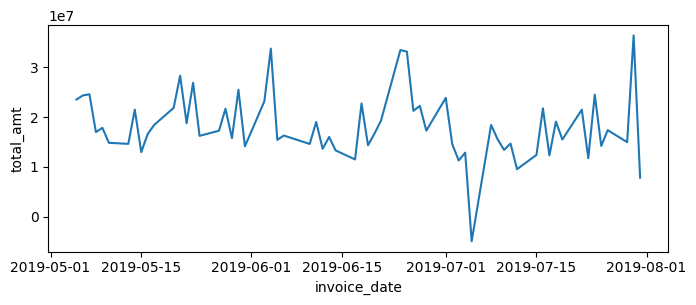

In [ ]:
df_bydate = df.groupby('invoice_date',as_index=False)['total_amt'].sum()
fig = plt.figure(figsize=(8,3),dpi=100)
sns.lineplot(x="invoice_date", y="total_amt", data=df_bydate)

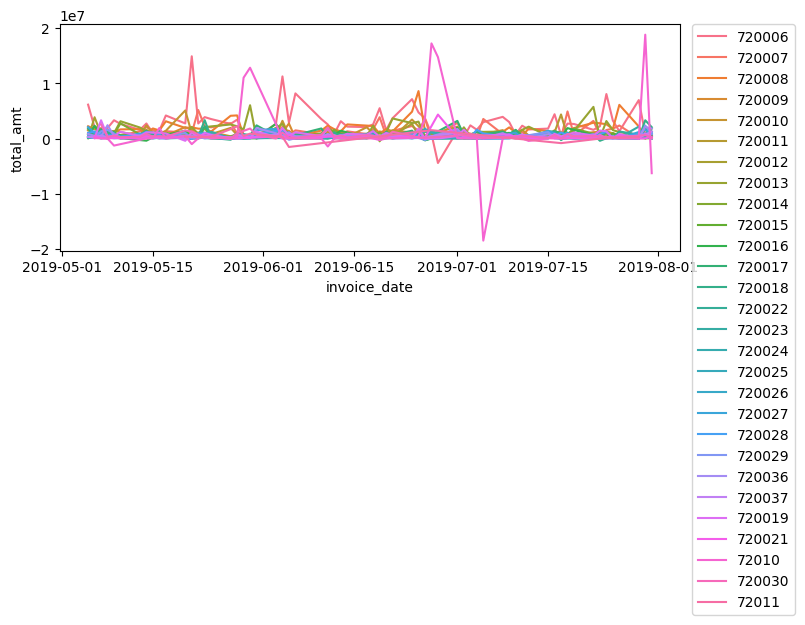

In [ ]:
df_bydate = df.groupby(['invoice_date','branch'],as_index=False)['total_amt'].sum()
fig = plt.figure(figsize=(8,3),dpi=100)
sns.lineplot(x="invoice_date", y="total_amt", data=df_bydate,hue='branch')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

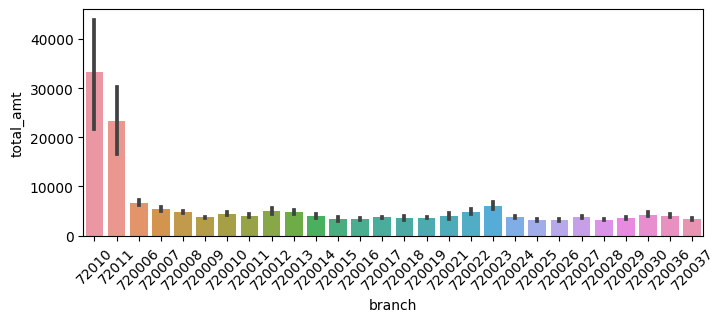

In [ ]:
fig = plt.figure(figsize=(8,3),dpi=100)
sns.barplot(data=df,x='branch',y='total_amt')
plt.xticks(rotation=45)

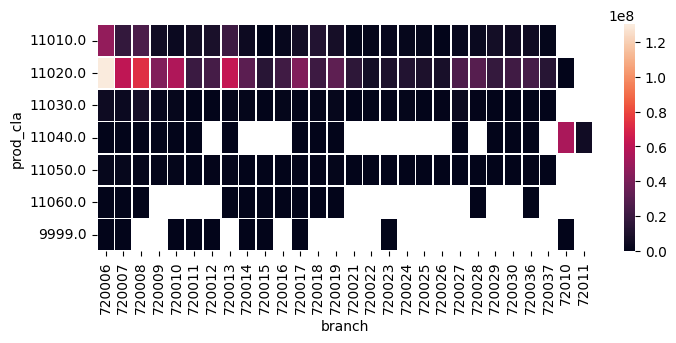

In [ ]:
df_branch_prodcla = df.groupby(['branch','prod_cla'],as_index=False)['total_amt'].sum()
df_branch_prodcla = df_branch_prodcla.pivot('prod_cla','branch','total_amt')
fig = plt.figure(figsize=(8,3),dpi=100)
sns.heatmap(df_branch_prodcla, linewidths=.5)


In [ ]:
df_distributor = df.groupby('distributor')['total_amt'].agg(['sum','count']).reset_index()

In [ ]:
df_distributor.head()

,distributor,sum,count
0,A000007001,1321804.72,398
1,A000007302,405210.82,144
2,A000007401,1965032.59,658
3,A000011701,817440.68,269
4,A000015601,-49519.83,6


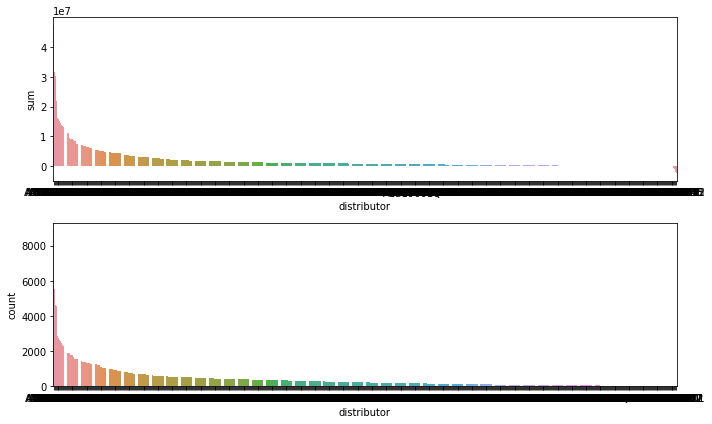

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
sns.barplot(data=df_distributor.sort_values(by='sum',ascending=False),x='distributor', y='sum')

plt.subplot(2,1,2)
sns.barplot(data=df_distributor.sort_values(by='count',ascending=False),x='distributor', y='count')

plt.tight_layout()

### Outliners

In [ ]:
## Analyze by invoice by distributor transactions
df_invoice = df.groupby(['invoice_no','invoice_date','distributor','branch'],as_index=False)['total_amt'].agg(['sum','count'])


In [ ]:
df_invoice.head()

In [ ]:
df_invoice.describe()

,sum,count
count,3.407400e+04,34074.000000
mean,3.365389e+04,7.302665
std,1.400541e+05,5.166712
min,-4.004956e+06,1.000000
25%,1.292035e+04,3.000000
50%,2.194249e+04,7.000000
75%,3.267589e+04,10.000000
max,6.516360e+06,99.000000


(0.0, 90000.0)

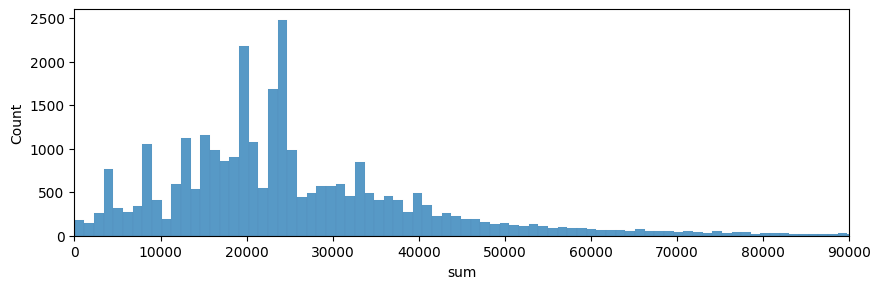

In [ ]:
df_inv_pos = df_invoice[df_invoice['sum'] > 0]
fig = plt.figure(figsize=(10,3),dpi=100)
sns.histplot(df_inv_pos['sum'])
plt.xlim(0,90000)

In [ ]:
## filtering abnormal invoices
len(df[(df['total_amt']<0) & (df['return'] == 'no')].head())

0

In [ ]:
std = np.std(df_inv_pos['sum'])
mean = np.mean(df_inv_pos['sum'])
print(mean, std)

40131.319292362714 139417.66200714052


In [ ]:
## Among those possitive value invoice, filter outliners which out of range of 3 std. 
inv_outliners = df_inv_pos[(df_inv_pos['sum'] > (mean + 3*std)) | (df_inv_pos['sum'] < (mean - 3*std))]

In [ ]:
df_invoice = df_invoice.reset_index()

In [ ]:
df_invoice.head()

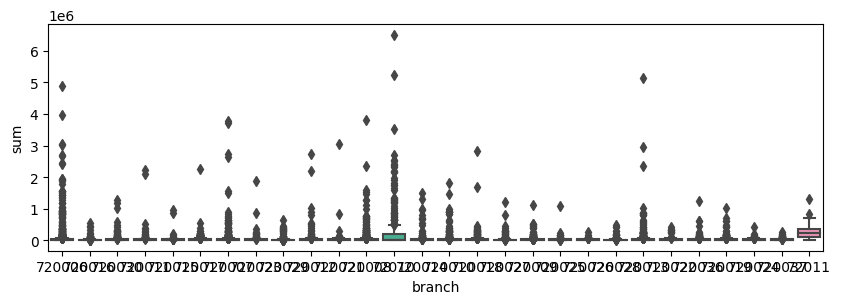

In [ ]:
fig = plt.figure(figsize=(10,3),dpi=100)
sns.boxplot(x='branch',y='sum',data=df_invoice[df_invoice['sum'] > 0])

In [ ]:
## find out those invoices shipped earler than order
df_earlyshiped = df[df['invoice_date'] > df['ship_date']]

In [ ]:
len(df_earlyshiped)